## Predicting Survival on the Titanic using Logistic Regression

In this assignment we will be building a logistic regression classifier to predict survival on the titanic.   

The model will use the independent variables sex, age and class to predict the dependent variable survived.  

### Data Prep
First, I will start with some data prep to get the data ready to be used in a model

In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Reading the data from the disk into memory
X = pd.read_csv("train.csv")
y = X.pop("Survived")

In [3]:
#Here are all the column names
X.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Making all missing values of Age equal to the average of Age
X['Age'].fillna(X.Age.mean(), inplace=True)

In [6]:
# Making sure our Age data is correct
X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# These variables don't seem to help so we are removing them from the dataset.
X.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [8]:
#IMPORTANT! get_dummies returns an indicator variable for each category.
#It's important to drop one category. Otherwise, you'll have two perfectly colinear variables.   

#Here, since we only have two variables it's easy. We'll take one variable and reassign it to sex. 
#Now Sex becomes female = 1, male = 0
X['Sex'] = pd.get_dummies(X.Sex)['female']

In [9]:
#Now we will create two new Embarked categories and rid of the original. This is similar to what we did above with Sex
X['EmbarkedS'] = pd.get_dummies(X.Embarked)['S']
X['EmbarkedC'] = pd.get_dummies(X.Embarked)['C']
X.drop(['Embarked'], axis=1, inplace=True)

In [10]:
# Making sure our data looks good. 
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,EmbarkedS,EmbarkedC
0,3,0,22.000000,1,0,7.2500,NaN,1,0
1,1,1,38.000000,1,0,71.2833,C85,0,1
2,3,1,26.000000,0,0,7.9250,NaN,1,0
3,1,1,35.000000,1,0,53.1000,C123,1,0
4,3,0,35.000000,0,0,8.0500,NaN,1,0
5,3,0,29.699118,0,0,8.4583,NaN,0,0
6,1,0,54.000000,0,0,51.8625,E46,1,0
7,3,0,2.000000,3,1,21.0750,NaN,1,0
8,3,1,27.000000,0,2,11.1333,NaN,1,0
9,2,1,14.000000,1,0,30.0708,NaN,0,1


In [11]:
# Borrowing this from David Sanchez - Change the Cabin variable to be only the first letter or None
def clean_cabin(x):
    try:
        return x[0]
    except TypeError:
        return "None"

X["Cabin"] = X.Cabin.apply(clean_cabin)

In [12]:
X['Cabin'].fillna('Missing', inplace=True)
dummies = pd.get_dummies(X['Cabin'], prefix='Cabin')
X = pd.concat([X, dummies], axis=1)
X.drop(['Cabin'], axis=1, inplace=True)

In [13]:
# We don't need an extra column.
X.drop(['Cabin_None'], axis=1, inplace=True)

In [14]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,EmbarkedS,EmbarkedC,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,3,0,22.000000,1,0,7.2500,1,0,0,0,0,0,0,0,0,0
1,1,1,38.000000,1,0,71.2833,0,1,0,0,1,0,0,0,0,0
2,3,1,26.000000,0,0,7.9250,1,0,0,0,0,0,0,0,0,0
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1,0,0,0,0,0
4,3,0,35.000000,0,0,8.0500,1,0,0,0,0,0,0,0,0,0
5,3,0,29.699118,0,0,8.4583,0,0,0,0,0,0,0,0,0,0
6,1,0,54.000000,0,0,51.8625,1,0,0,0,0,0,1,0,0,0
7,3,0,2.000000,3,1,21.0750,1,0,0,0,0,0,0,0,0,0
8,3,1,27.000000,0,2,11.1333,1,0,0,0,0,0,0,0,0,0
9,2,1,14.000000,1,0,30.0708,0,1,0,0,0,0,0,0,0,0


In [15]:
# Tried out OneHotEncoder on top of everything. However, it doesn't seem necessary and doesn't make much difference 
# in the results. 

#from sklearn.preprocessing import OneHotEncoder

In [16]:
#enc = OneHotEncoder(sparse=False)
#X = enc.fit_transform(X)
#X

In [18]:
# Remember to scale our features, as with linear regression. 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
# Build test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Creation
At this point we have a test set and train set defined.  We will use the train set to train our model and the test set to see how accurate the model is.

First, we will build a simple 'base rate' model to compare our logistic model to, so we can see if our logistic model is useful or not.  

Then, we'll build our logistic model.


#### Base Rate Model
For my base rate model, we're going to predict that everyone dies.

In [20]:
#This function looks for females in the test set and returns 1, survived, otherwise it returns 0
def base_rate_model(X):
    y = np.zeros(X.shape[0])
    return y    

In [21]:
#how accurate is my base rate model?
y_base_rate = base_rate_model(X_test)
from sklearn.metrics import accuracy_score
print("Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate))

Base rate accuracy is 0.59


#### So, our base model is 59% correct, lets see if logistic can beat it.

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

In [23]:
model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
print("Logistic accuracy is %2.2f" % accuracy_score(y_test,model.predict(X_test)))

Logistic accuracy is 0.82


### Model Comparison

Our base model wasn't very good, but it looked better than it was because of class imbalance.  There are many more 0s than 1s in our dataset, so if we just guess 0 we can 'cheat.'

A better metric for binary classifer comparisons is AUC or area under the curve. 

Closely related is [precision and recall](http://scikit-learn.org/stable/auto_examples/plot_precision_recall.html).

Precision is the fraction of correctly identified examples of a class (ratio of true positives to all positives).

Recall is the fraction of observastions classified in that class that was correctly classified.  

#### It seems important to point out that most of the women in first class survived. 


In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

In [26]:
print("---Base Model---")
#base rate AUC
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print("Base Rate AUC = %2.2f" % base_roc_auc)
print(classification_report(y_test,base_rate_model(X_test)))
print("\n\n---Logistic Model---")
#logistic AUC
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, model.predict(X_test)))

---Base Model---
Base Rate AUC = 0.50
             precision    recall  f1-score   support

          0       0.59      1.00      0.74       105
          1       0.00      0.00      0.00        74

avg / total       0.34      0.59      0.43       179



---Logistic Model---
Logistic AUC = 0.80
             precision    recall  f1-score   support

          0       0.83      0.87      0.85       105
          1       0.80      0.74      0.77        74

avg / total       0.81      0.82      0.81       179



C:\Users\acosta-diazk\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

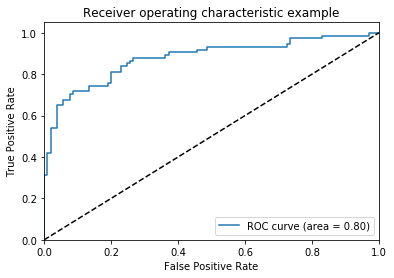

In [28]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()